<a href="https://colab.research.google.com/github/Lohith288/AI-ML-INTERNSHIP-VRSEC/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive    #including the files from the google drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd             #imports to make the functionality of the pandas library available in your Python script
import matplotlib.pyplot as plt #used to plot the graphs
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/week1/dataset1.csv')  #reading the data set from the drive
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.head() #it displays the first 5 elements in the data set

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()  #It displays the last 5 elements in the data set

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.info() #Gives the information about the type of the data like int,float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
data.nunique()  #Gives the no of unique elements

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [ ]:
data.isnull().sum() #returns the no of missing values in the dataset

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
(data.isnull().sum()/(len(data)))*100  #It represents the percentage of the missing elements in the data set

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

In [ ]:
data2 = data.drop(['credit_score','products_number'],axis=1)    #removing the credit score and the products number because the primary aim of the data set is to calculate the churn so to calculate the churn we need to know whether activemember or not
data2


,customer_id,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
0,15634602,France,Female,42,2,0.00,1,1,101348.88,1
1,15647311,Spain,Female,41,1,83807.86,0,1,112542.58,0
2,15619304,France,Female,42,8,159660.80,1,0,113931.57,1
3,15701354,France,Female,39,1,0.00,0,0,93826.63,0
4,15737888,Spain,Female,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,Male,39,5,0.00,1,0,96270.64,0
9996,15569892,France,Male,35,10,57369.61,1,1,101699.77,0
9997,15584532,France,Female,36,7,0.00,0,1,42085.58,1
9998,15682355,Germany,Male,42,3,75075.31,1,0,92888.52,1


In [ ]:
import pandas as pd
df = data2
df['churn'] = 1
df.loc[df['active_member'] == 1, 'churn'] = 0    #by applying the logic given we get the churn value
print(df.head())


   customer_id country  gender  age  tenure    balance  credit_card  \
0     15634602  France  Female   42       2       0.00            1   
1     15647311   Spain  Female   41       1   83807.86            0   
2     15619304  France  Female   42       8  159660.80            1   
3     15701354  France  Female   39       1       0.00            0   
4     15737888   Spain  Female   43       2  125510.82            1   

   active_member  estimated_salary  churn  
0              1         101348.88      0  
1              1         112542.58      0  
2              0         113931.57      1  
3              0          93826.63      1  
4              1          79084.10      0  


In [ ]:
df

,customer_id,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
0,15634602,France,Female,42,2,0.00,1,1,101348.88,0
1,15647311,Spain,Female,41,1,83807.86,0,1,112542.58,0
2,15619304,France,Female,42,8,159660.80,1,0,113931.57,1
3,15701354,France,Female,39,1,0.00,0,0,93826.63,1
4,15737888,Spain,Female,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,Male,39,5,0.00,1,0,96270.64,1
9996,15569892,France,Male,35,10,57369.61,1,1,101699.77,0
9997,15584532,France,Female,36,7,0.00,0,1,42085.58,0
9998,15682355,Germany,Male,42,3,75075.31,1,0,92888.52,1


In [ ]:
data2.describe().T #Gives the stastistics about the given data

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,4.849000e-01,0.499797,0.00,0.00,0.000000e+00,1.000000e+00,1.00


In [ ]:
data2.describe(include='all').T  # provides a statistics summary of all data, include object, category etc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
estimated_salary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn,10000.0,NaN,NaN,NaN,0.4849,0.499797,0.0,0.0,0.0,1.0,1.0


In [ ]:
import numpy as np
cat_cols=data2.select_dtypes(include=['object']).columns
num_cols = data2.select_dtypes(include=np.number).columns.tolist()     #Catagorize the Variables i.e Categorial Variables and Numerical Variables
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['country', 'gender'], dtype='object')
Numerical Variables:
['customer_id', 'age', 'tenure', 'balance', 'credit_card', 'active_member', 'estimated_salary', 'churn']


customer_id
Skew : 0.0


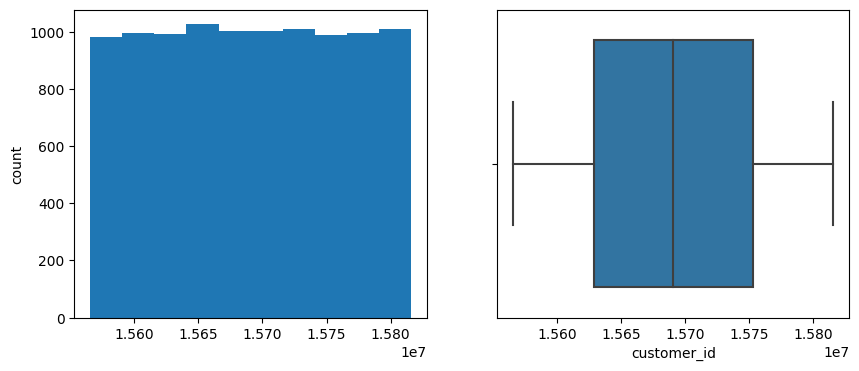

age
Skew : 1.01


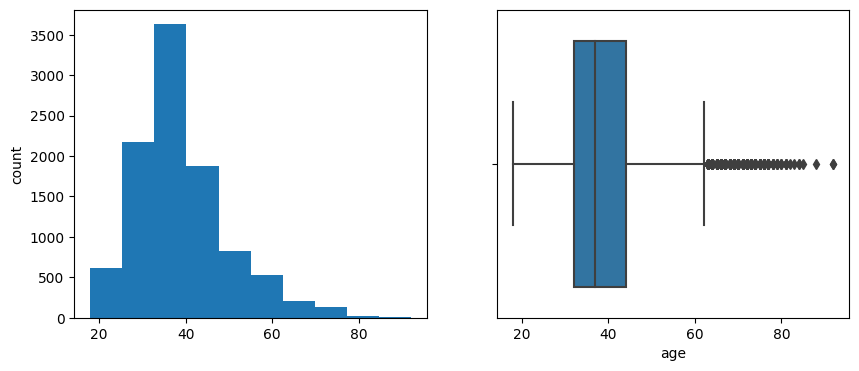

tenure
Skew : 0.01


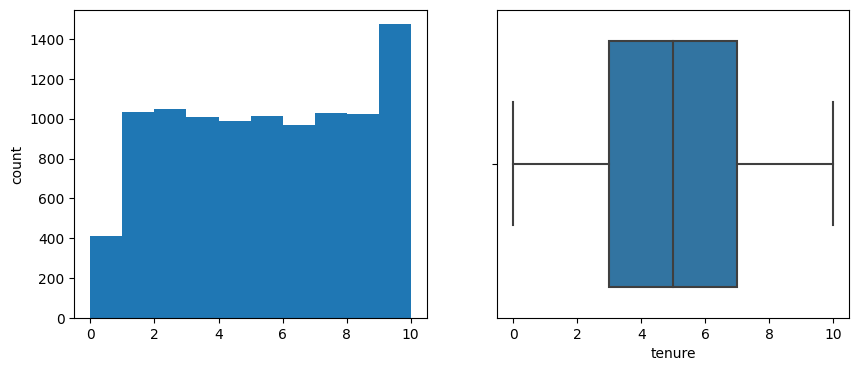

balance
Skew : -0.14


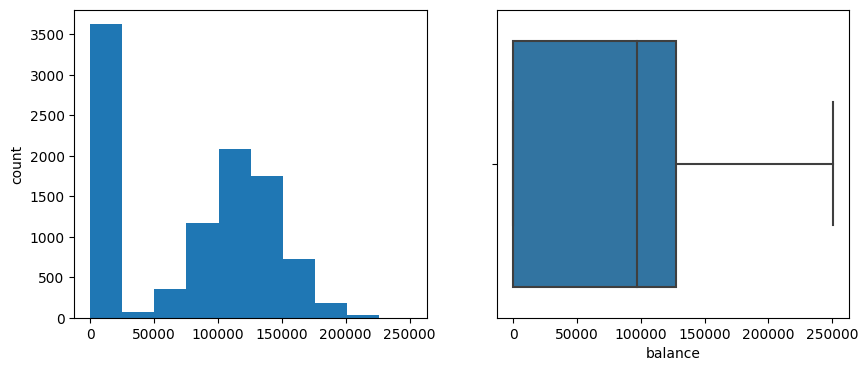

credit_card
Skew : -0.9


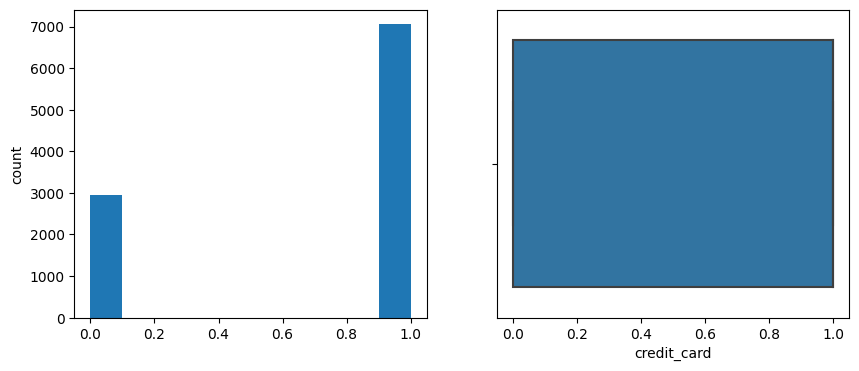

active_member
Skew : -0.06


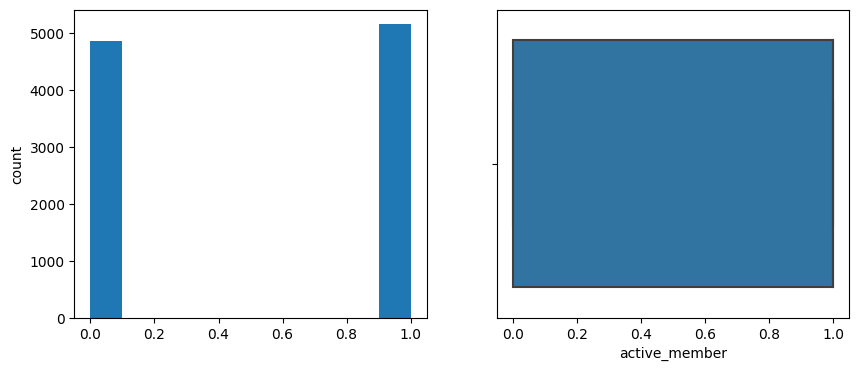

estimated_salary
Skew : 0.0


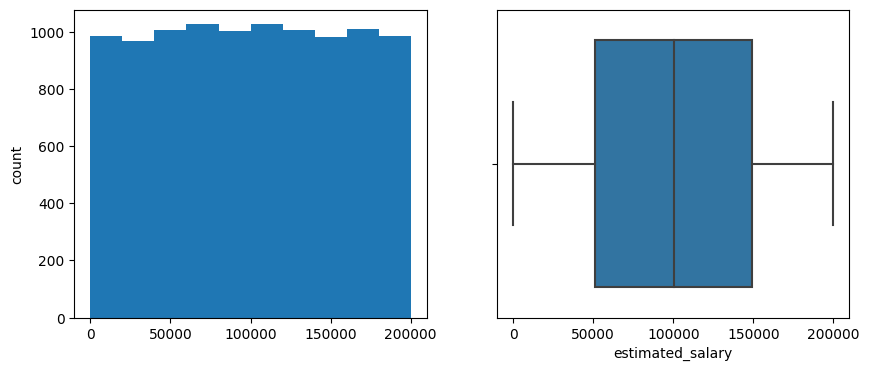

churn
Skew : 1.47


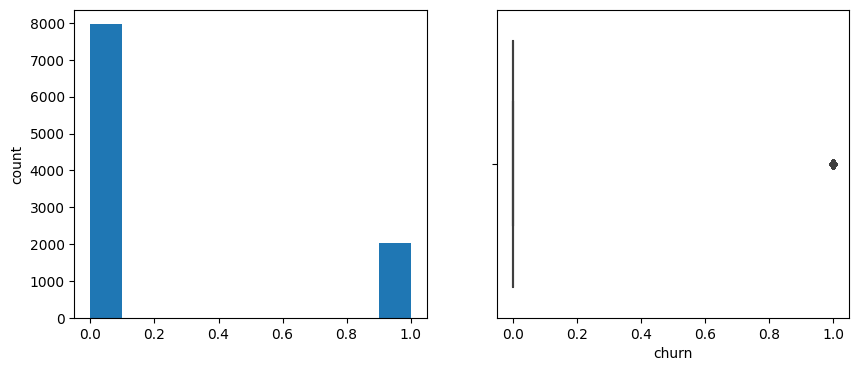

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)                                        #plotting using the histogram and box plot
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

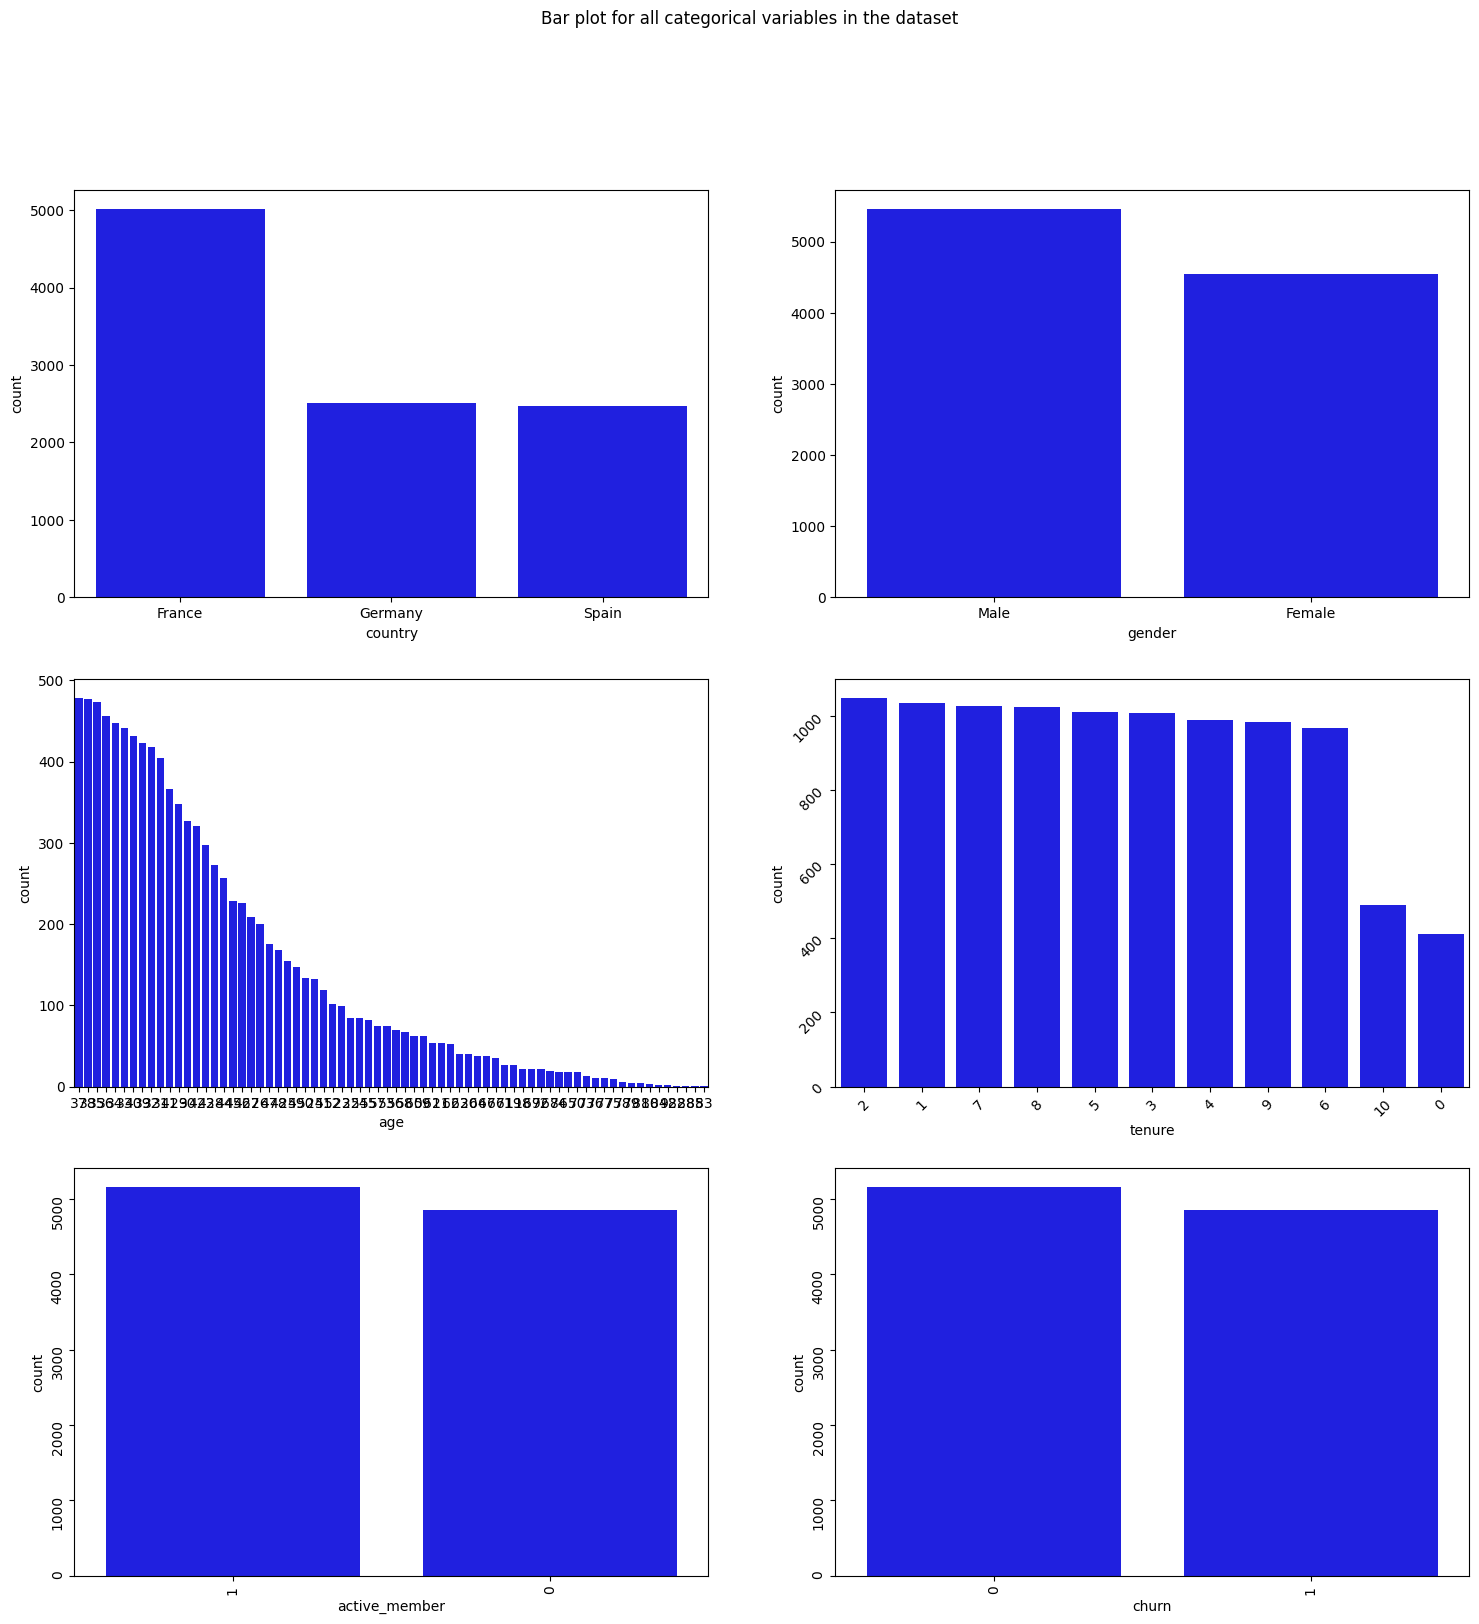

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'country', data = data2, color = 'blue',      #Gives the bar plot of the data
              order = data['country'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'gender', data = data2, color = 'blue',
              order = data['gender'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'age', data = data2, color = 'blue',
              order = data['age'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'tenure', data = data2, color = 'blue',
              order = data['tenure'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'active_member', data = data2, color = 'blue',
              order = data['active_member'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'churn', data = data2, color = 'blue',
              order = data['churn'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

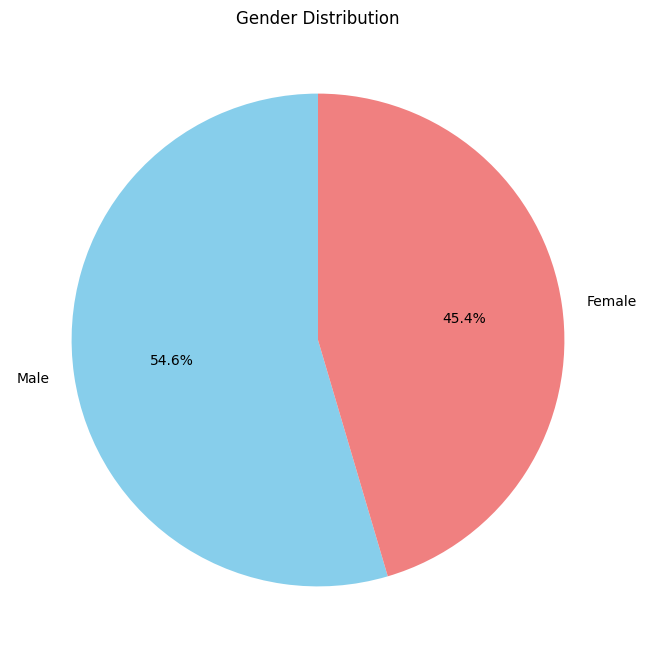

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
chr = df['gender'].value_counts()            #Gives the pie chart analyasis of the data
gender_distribution = chr
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()
